In [8]:
import bilby
import numpy as np
from pycbc.waveform import get_td_waveform
import pylab

import matplotlib.pyplot as plt
%matplotlib inline

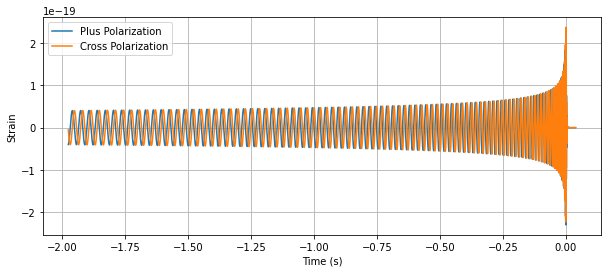

In [2]:
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/16384,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

In [ ]:
hp, hc = get_td_waveform(approximant="EccentricFD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/16384,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

In [12]:
outdir = 'outdir'
label = 'create_your_own_source_model'
sampling_frequency = 4096
duration = 1


In [16]:
def sine_gaussian(f, A, f0, tau, phi0, geocent_time, ra, dec, psi, **kwargs):
    arg = -(np.pi * tau * (f - f0))**2 + 1j * phi0
    plus = np.sqrt(np.pi) * A * tau * np.exp(arg) / 2.
    cross = plus * np.exp(1j * np.pi / 2)
    return {'plus': plus, 'cross': cross}

In [18]:
injection_parameters = dict(A=1e-23, f0=100, tau=1, phi0=0, geocent_time=0,
                            ra=0, dec=0, psi=0, mass_1=30, mass_2=35)

waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=sine_gaussian)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)


22:51 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.sine_gaussian
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
22:51 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
22:51 bilby INFO    : Generation of source frame parameters failed with message 'luminosity_distance'
22:51 bilby WARNING : Injecting signal outside segment, start_time=-3, merger time=0.
22:51 bilby INFO    : Injected signal in H1:
22:51 bilby INFO    :   optimal SNR = 3.19
22:51 bilby INFO    :   matched filter SNR = 5.06-1.52j
22:51 bilby INFO    :   A = 1e-23
22:51 bilby INFO    :   f0 = 100
22:51 bilby INFO    :   tau = 1
22:51 bilby INFO    :   phi0 = 0
22:51 bilby INFO    :   geocent_time = 0
22:51 bilby INFO    :   ra = 0
22:51 bilby INFO    :   dec = 0
22:51 bilby INFO    :   psi = 0
22:51 bilby INFO    :   mass_1 = 30
22:51 bilby INFO    :   mass_2 = 35
22:51 bilby I

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

22:52 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
22:52 bilby INFO    : Generation of source frame parameters failed with message 'luminosity_distance'
22:52 bilby WARNING : Injecting signal outside segment, start_time=-3, merger time=0.
22:52 bilby INFO    : Injected signal in H1:
22:52 bilby INFO    :   optimal SNR = 3.19
22:52 bilby INFO    :   matched filter SNR = 11.44-1.52j
22:52 bilby INFO    :   A = 1e-23
22:52 bilby INFO    :   f0 = 100
22:52 bilby INFO    :   tau = 1
22:52 bilby INFO    :   phi0 = 0
22:52 bilby INFO    :   geocent_time = 0
22:52 bilby INFO    :   ra = 0
22:52 bilby INFO    :   dec = 0
22:52 bilby INFO    :   psi = 0
22:52 bilby INFO    :   mass_1 = 30
22:52 bilby INFO    :   mass_2 = 35
22:52 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
22:52 bilby INFO    : Generation of source frame parameters failed with message 'luminosity_distance'
22:52 bilby WARNING : Injecting signal outside segment, start

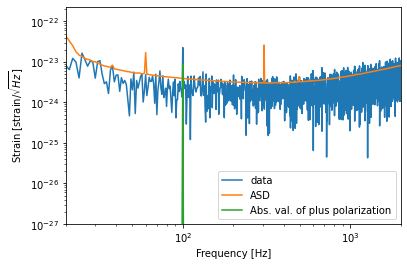

In [21]:
#to plot the frequency domain  
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

'''L1 = ifos[1]
L1_injection = injection[1]

ax.loglog(L1.frequency_array[idxs]+5,
          L1.amplitude_spectral_density_array[idxs],
          label="ASD")'''

ax.set_xlim(20,2000)
ax.set_ylim(1e-27,2.327737159425905e-22)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [7]:
import lalsimulation as lal

In [9]:
frequency_array = np.arange(0.0,512.0,0.25)

In [10]:
waveform_kwargs = dict(
        waveform_approximant='PeriastronEccFD', reference_frequency=20.0,
        minimum_frequency=20.0, maximum_frequency=frequency_array[-1],
        catch_waveform_errors=False, pn_spin_order=-1, pn_tidal_order=-1,
        pn_phase_order=-1, pn_amplitude_order=0)

In [11]:
test = bilby.gw.source._base_lal_cbc_fd_waveform(
        frequency_array=frequency_array, mass_1=30.0, mass_2=30.0,
        luminosity_distance=430, theta_jn=0.785, phase=0.785,
        a_1=0.0, a_2=0.0, tilt_1=0.0, tilt_2=0.0, phi_12=0.0,
        phi_jl=0.0, lambda_1=0.0, lambda_2=0.0, **waveform_kwargs)

In [12]:
test["plus"]

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])